# Final Project: Direction Change driven strategy for foreign currency trading

Fang(David) Du, Xiaomeng Wang, Jiayi Lin

# Abstract

In this project, we study the performance of Directional Change(DC) based trading strategy.
We run two versions of the strategy by using fixed and dynamic threshold, and optimize parameter for threshold value and loss control line. Capital is set before trading to be 10 x 10^6 USD, a 5x leverage is used for each position, and a stop loss of 10% is installed. The trading simulation of the best performing strategy shows a annual return of $72\%$, with Sharpe Ratio $1.75$ and Sortino Ratio $2.40$, which is really attractive. The strategy has relatively high risks: the standard deviation of annual returns are around $17\%$ and the maximum drawdown is around $30\%$.

# Introduction

## Model I: Static Threshold Single-currency Model

First, we started by building the most basic strategy with a single currency-pair. This model will serve as a prototype for our actual trading strategies below

Directional change(DC) methods looks into the magnitude of price changes. Investors decide a threshold theta, to which the magnitude of price change is compared. An event in the DC method is either a Downturn Event or an Upturn Event. The period between a Downturn Event and the next Upturn Event is a Downward Run, while the period between an Upturn Event and the next Downturn Event is an Upward Run. we have the following equations to keep updating last low price and last high price for Downward Run and Upward Run respectively: 

(1) $P_e$ = $Min(P_c, P_e)$

(2) $P_e$ = $Max(P_c, P_e)$

An Upturn Event is identified during a Downward Run when the percentage change between current price p_c and last low price P_e exceeds the predetermined threshold: $\theta$

While a Downturn Event is identified during an Upward Run when percentage change between current price and the last high price P_e drops below the predetermined threshold: $-\theta$

In a nutshell, a directional change event is observed when 

$$\begin {equation*} (3) | (P_c - P_e) / P_e | > \theta \end {equation*}$$ 

where $P_c$ is the current price, $P_e$ is extreme price (last low price during Downward Run and last high price during Upward Run), and $\theta$ is the threshold

After reviewing the contrarian trading strategy from the paper "Backlash Agent: A Trading Strategy Based On Directional Change", we decide to first come up with a different model. Rather than making a sell order when the prices are rising, and a buy order when the prices are falling as a contrarian trader, we decide to follow the trend and profit from the momentum. The key of our trading logic is as the following:

We have an event indicator $Indicator_e$ = 1 if upturn event discovered and -1 if downturn event discovered

If $Indicator_e$ == -1, we open a short position ($Pos_i$ = -1). During the overshoot period that follows the Downturn Event, if the rate have fallen for more than a proportion of threshold: $\theta / c$ where c is constant, then we close our short position.

If $Indicator_e$ == 1, we open a long position ($Pos_i$ = +1). During the overshoot period that follows the Upturn Event, if the rate have increased for more than a proportion of threshold: $\theta / c$ where c is constant, then we close our long position.

Our argument for following the trend rather than going against the trend(contrain) is that we believe in that momentum is very powerful in foreign currency exchange market. We explore if this belief holds to be true in the simulation result section.


### Data Selection
In this study of foreign currency market trading strategy, we make our attempt by first applying our DC strategy to multiple currencies. We then form portfolio of these currencies. For our convinience, because we will need yield curve data (see section 4), we restricted the data selection scope to countries with short-term yield curve(no longer than 1 year) available on Quandl YC section.

We assumed only including straight currency pairs (Base Currency X: USD + Quote Currency Y: Another currency)trading. Considering that interest rate might be an influential factor to PNL, We obtained the list Y currencies refering their interest rate from https://tradingeconomics.com/country-list/interest-rate
And form Y list (interest rate in parenthesis): 

CHF(-0.75%), JPY(-0.1%), SEK(0%), SGD(0.09%), CAD(0.25%), CNY(3.85%), INR(4%)

We think that low interest rate currency will perform better because it avoids the interest deducted from borrowing. Thus, among the seven currency in our portfolio, three has zero or negative interest rate. As our strategy trades very frequently, we want to make sure interest cost from borrowing is as small as possible. 

### Static Threshold (ST) Trading Strategy for Currency Portfolio

This strategy builds on the previous single-currency strategy by constructing a portfolio of many different curency pairs. 

For this strategy, we employ static, but trained theta thresholds. We used year 2013-2015 data as the trainng set, from which we choose the best set of thetas by running Model I and choosing the theta associated with the best sortino ratio.

Our portfolio consists of seven currency pairs(X: USD, Y: one of the seven currencies), with each currency pair considered as an asset. We first allocate evenly or according to relative sortino ratios from the training period to the seven currencies. Then when we close or change position on any currency-pair in our portfolio, we accrual the total pnl from the previous position to our total capital. After we calculate the total running capital by summing up their separate running capital, we reallocate the total running capital to them either evenly or by a pre-determined allocation (according to relative sortino ratios from the training period). 

## Model II: Dynamic Threshold Single-Currency Model

In DC, an event is detected if the price change exceeds/ falls below the given fixed threshold value. Howevver, depending on the fixed threshold value, a significant event may be missed if the threshold is not satisfied. Consider the following scenario during an upward run and we have a fixed threshold value 1%. Suppose a sudden price decrease by 0.99% takes place during the current day, but as the threshold is not satisfied no downturn event is detected although the price decrease is significant but misses the threshold by a very small value. After a few days when the prices go down again by 0.01%, in this case, a downturn event is then detected as the threshold is met. Hence, according to research papers such as "A Directional Change Based Trading Strategy with Dynamic Threshold" by Nora Aklhamees and Maria Fasli, we experimented with a dynamic threshold that is daily calculated, to see whether it is more appropriate and deisrable for evenet detection. 

The dynamic threshold is defined based on the price change between the current price p(t) and the last high (p_h)  or low (p_l) price, together with what has happened during the previous day.
        
(i) We first start by calculating the percentage difference of the last high price p_h/ last low price p_t reached during the current upward/ downward run and the curernt day opening price. This captures the idea of the DC event detection. In the upward run case, 
$$\begin {equation*} (5) A = \frac{p_h - C_{p_{open}}}{p_h} \end {equation*}$$

while in the downward run case:
$$\begin {equation*} (6) A = \frac{p_l - C_{p_{open}}}{p_l} \end {equation*}$$

(ii) Then we consider what has happened on the previous day, hence we calculate the percentage difference of the previous day opening price (P_p_open) and closing price (P_p_close) to sidcover price transitions that have happened the previous day. The higher the percentage difference, the higher the likelihood that an event has happened.
$$\begin {equation*} (7) B = \frac{P_{p_{open}} - P_{p_{close}}}{P_{p_{close}}} \end {equation*}$$

(iii) We also consider what has happened overnight, thus we calculate the percentage diffrence of the preivous day closing price (P_p_close) and current day opening price (C_p_open) to discover price transitions taking place between the previous day closing price and current day opening price (overnight). Again, the higher the percentage, the higher the likelihood that an event has happened/ is currently unfolding
$$\begin {equation*} (8) C = \frac{P_{p_{close}} - C_{p_{open}}}{P_{p_{close}}} \end {equation*}$$

Both the previous day and overnight percentage difference are consider as indicators of an event happening if the difference between the opening and closing price is big. The overall threshold is the sum of the aforementioned metrics A, B, and C. In order to avoid detecting events based only on the price change between the current day opening price and p_h/ p_l (the A metric), we have considered adjusting the values of B and C with small weights to increase their values if they are too small and have no effect. If the vlues of metrics of B and C are already too big, these weights are of small value and will still be satisfied throughout the day as prices are increasing or decreasing. 

$$\begin {equation*} (9) Threshold = A + B \times \omega_1 + C \times \omega_2 \end {equation*}$$

For the remaining portion of the model, it is essentially the same as the static Threshold model, where we use the calculated threshold to identify upturn and downturn event and hence trade accordingly.


### Data Selection
Similar to the static threshold model, we make our attempt by applying our Dynamic DC strategy to multiple currencies, namely JPY, CAD, SEK, CHF and SGD. One key difference in dataset selection is that we import our dataset from www.investing.com. This is because for every currency we require not only its currency rate (provided by Quandl Forex dataset) but also its daily open and close price. 

For other aspects of data selection, refer to "Data Selection" under "Static Threshold Model" for more explanation.

### Dynamic Threshold (DT) Trading Strategy for Currency Portfolio

This strategy builds on the previous single-currency strategy with dynamic threshold by constructing a portfolio of many different curency pairs. Our portfolio consists of five currency pairs (X: USD, Y: one of the five curerncies), with each currency pair considered as an asset. When we close or change position on any currency-pair in our portfolio, we accrual the total pnl from the previous position to our total capital. After we calculate the total running capital by summing up their separate running capital, we reallocate the total running capital to them either evenly or by a pre-determined allocation (according to relative sortino ratios from the training period). 

For this strategy, we experimented with tuning of multiple factors, including weight_1, weight_2, stop ratio and allocation ratio. For the first three factors, we used year 2013- 2014 data as the training set, and conduct the following trainings:

(i) For each individual currency, we train the best set of (weight_1, weight_2, stop) and combine these sets to for a set of parameters where each individual currency has its own weight_1, weight_2 and stop. We then test this set of parameters with even allocation of capital.

(ii) Instead of computing sets of parameters for each individual currency, we train a set of parameters with only one weight_1 value, one weight_2 and one stop ratio which is then applicable to all currency pairs.

(iii) We then train the allocation (i.e. how much of the capital should be allocated to one currency pair), according to the performance of each individual currency pair.

### Trading Simulation
We make the following assumptions to simulate trading:

(1) we assume capital of $10 x 10^6$ and a 5x leverage.

(2) Transaction cost: As we use major currencies, we count the transaction cost to be one basis point. So each trading cost $1000 on average.

(3) Borrowing cost: we use short term interest rate downloaded from quandl to account for the interest deducted from taking leverage. 

### PnL 

When we are in a short position (pos = -1), we borrow four times our capital to raise a total of 5xCapital. Then we sell dollars and buy the foreign currency. Our daily pnl is calculated as 

$$5\times Capital - 5\times capital \times \frac{FX_{t-1}}{FX_{t}} - (4\times capital) \times \frac{\text{foreign interest rate}}{100\times 365}$$

When we are in a long position, we borrow four times our capital equivalent foreign currency to raise a total of 5xCapital dollar's worth of foreign currency. Then we sell the foreign currency and buy US Dollars. Our daily pnl is calculated as 

$$5\times capital \times \frac{FX_{t-1}}{FX_{t}} - 5\times Capital - (4\times capital) \times \frac{\text{US interest rate}}{100\times 365}$$

Where the Foreign interest rate and US interest rate are the most short-term interest rate available on quandl.

### Risk Control
For each our strategy we makes, we include a stop loss parameter: $S$
In the simple DC version, the logic is that we close our position whenever our positional pnl is less than -Capital * S:

$$\begin {equation*} (4) PositionPNL < -Capital * S \end {equation*}$$ 

This parameter is moreover tuned through both quanlitative(heatmap) and quantitative(numerical multivariate optimization) methods.

We also make the following assumptions and executions to mitigate downward risk:

-we learnt from CIFER paper that "an overshoot event lasts on average twice the length of a DC event" but as some currency shifts momentum  very rapidly from time to time, we make sure that rather than staying until the end of an overshoot event, we immediately close out our position once we detect the next DC event.

-Among the seven currency in our portfolio, three has zero or negative interest rate. As our strategy trades very frequently, we want to make sure interest cost from borrowing is as small as possible. 

-We embed in our strategy stop loss order so that whenever the trend-following fails (i.e $PositionPNL < -0.1 * Capital$), we close our position

# Strategy Implementation

### 1. Fixed Threshold (Model I)

In [1]:
import Final_code as s
import matplotlib.pyplot as plt

In [2]:
dfs = s.get_all_pairs()
dfs_train = s.get_all_pairs()

In [3]:
results, returns, thetas, stops, sortinos = s.train_theta_all(dfs_train)

best_theta:0.001, best_stop: 0.1, sortino:0.08381146148768266
best_theta:0.015, best_stop: 0.1, sortino:0.038188179250957494
best_theta:0.015, best_stop: 0.1, sortino:0.05037919174417689
best_theta:0.001, best_stop: 0.1, sortino:0.0840914107441524
best_theta:0.001, best_stop: 0.1, sortino:0.008052188075727903
best_theta:0.004, best_stop: 0.1, sortino:0.014165472637998914
best_theta:0.001, best_stop: 0.1, sortino:0.04087415076258302


In [4]:
dfs1, total_capital1, running_capital1, daily_total_pnl1 = s.DC_portfolio(dfs, thetas)

In [5]:
allocation = [sortinos[i]/sum(sortinos) for i in range(len(sortinos))]
dfs2, total_capital2, running_capital2, daily_total_pnl2 = s.DC_portfolio(dfs, thetas, 0.1, allocation)

In [6]:
ret1 = s.get_pnls(dfs1, daily_total_pnl1, running_capital1)
ret2 = s.get_pnls(dfs2, daily_total_pnl2, running_capital2)

In [7]:
thetas3 = [0.01 for i in range(7)]
thetas4 = [0.005 for i in range(7)]
dfs3, total_capital3, running_capital3, daily_total_pnl3 = s.DC_portfolio(dfs, thetas3, 0.1)
ret3 = s.get_pnls(dfs3, daily_total_pnl3, running_capital3)
dfs4, total_capital4, running_capital4, daily_total_pnl4 = s.DC_portfolio(dfs, thetas4, 0.1)
ret4 = s.get_pnls(dfs4, daily_total_pnl4, running_capital4)

/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


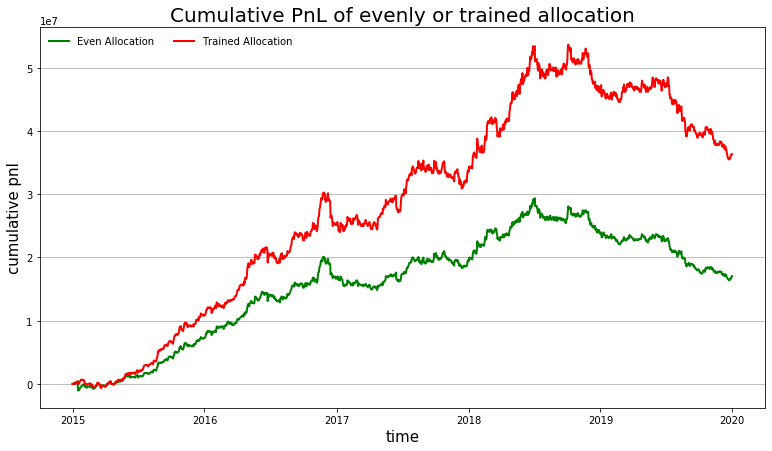

In [8]:
plt.figure(figsize = (13,7))
plt.title('Cumulative PnL of evenly or trained allocation', fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('cumulative pnl', fontsize = 15)
plt.grid(axis = 'y')
plt.plot(ret1.index, ret1['pnl'].cumsum(), '-', color = 'green', linewidth = 2)
plt.plot(ret1.index, ret2['pnl'].cumsum(), '-', color = 'red', linewidth = 2)
plt.legend(['Even Allocation', 'Trained Allocation'], frameon = False, ncol = 2, fontsize = 10)
plt.show()

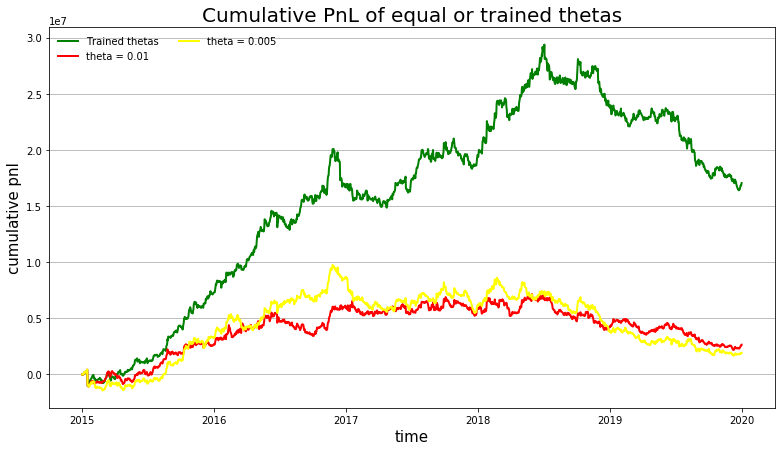

In [9]:
plt.figure(figsize = (13,7))
plt.title('Cumulative PnL of equal or trained thetas', fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('cumulative pnl', fontsize = 15)
plt.grid(axis = 'y')
plt.plot(ret1.index, ret1['pnl'].cumsum(), '-', color = 'green', linewidth = 2)
plt.plot(ret1.index, ret3['pnl'].cumsum(), '-', color = 'red', linewidth = 2)
plt.plot(ret1.index, ret4['pnl'].cumsum(), '-', color = 'yellow', linewidth = 2)
plt.legend(['Trained thetas', 'theta = 0.01', 'theta = 0.005'], frameon = False, ncol = 2, fontsize = 10)
plt.show()

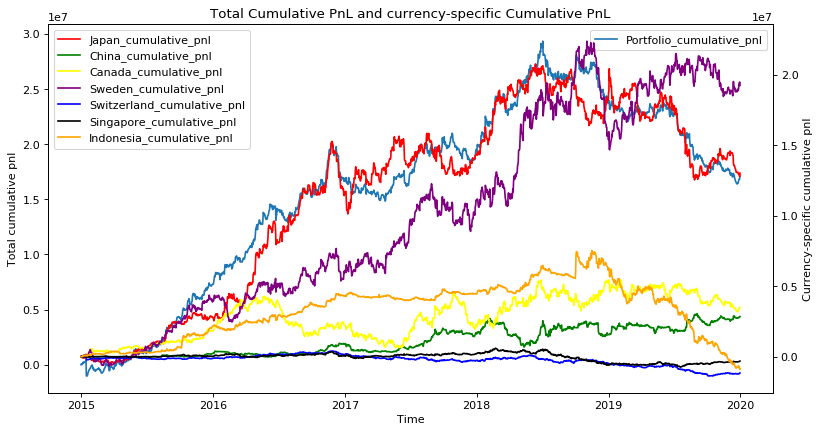

In [10]:
s.plot_pnls(ret1)

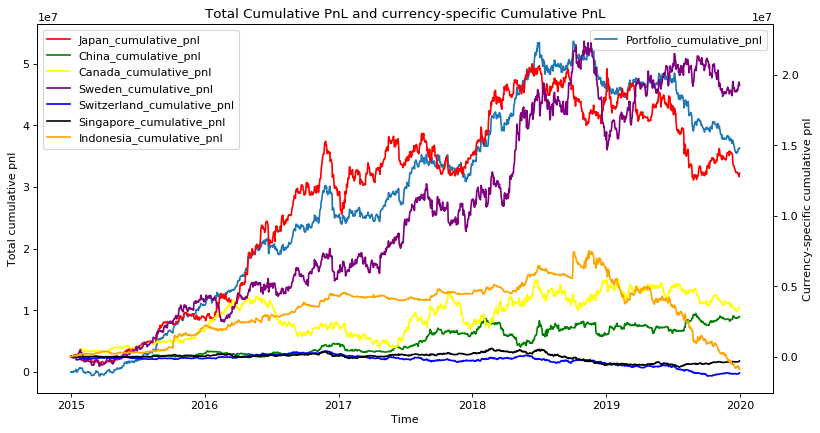

In [11]:
s.plot_pnls(ret2)

#### Statistics of strategy return with trained theta and even capital allocation

In [12]:
s.Strats_eval(ret1, 10e6)

/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Return on Investment,Volatility,Downside Beta,Value at Risk at 90% CL,Value at Risk at 99% CL,Maximum Drawdown,annualized ROI,annualized sharpe ratio,annualized sortino ratio
0,1.704292,0.008712,0.240651,-0.019262,-0.061353,0.329576,0.340858,1.265339,1.480246


#### Statistics of strategy return with trained theta and trained capital allocation

In [13]:
s.Strats_eval(ret2, 10e6)

,Return on Investment,Volatility,Downside Beta,Value at Risk at 90% CL,Value at Risk at 99% CL,Maximum Drawdown,annualized ROI,annualized sharpe ratio,annualized sortino ratio
0,3.633556,0.009701,0.4809,-0.03449,-0.111695,0.285481,0.726711,1.747083,2.397828


Result: 

1. The strategy that uses best theta from the training set outperforms fixed, uniform thetas. Allocating capital according to training set's best sortino ratios outperforms evenly allocating capital significantly.

2. By using trained thetas and allocating relative to sortino ratios, the strategy yields a total return of 363% (72% annualized), sharpe ratio is 1.74, sortino ratio is 2.39, downside beta is 0.48, VaR at 99% is -0.11, Maximum Drawdown is 0.28. Therefore, this strategy is highly profitable with relatively small downside risk.

3. From plot of country-specific cumulative pnl, we find that the most profitable pairs are USD/JPY and USD/SEK, with USD/SEK earning as much as $2 x 10^7$ final pnl, and all the other pairs cumulative pnl fluctute around zero (most of the time above zero). These two pairs are indeed the best performing ones from the training set, which means they get bigger allocation of capital. When all seven pairs add up, we get a steadily increasing total cumulative pnl, which is very solid result.

### 2. Dynamic Threshold (Model II)

In [14]:
dynamic_dfs_train = [s.JPY_train, s.CAD_train, s.SEK_train, s.CHF_train, s.SGD_train]
dynamic_dfs_test = [s.JPY_test, s.CAD_test, s.SEK_test, s.CHF_test, s.SGD_test]

#### First experiment: train individual sets of parameters for each currency pair

In [15]:
stop, w1, w2 = s.train_weights(s.JPY_train)
stop, w1, w2 = s.train_weights(s.CAD_train)
stop, w1, w2 = s.train_weights(s.SEK_train)
stop, w1, w2 = s.train_weights(s.CHF_train)
stop, w1, w2 = s.train_weights(s.SGD_train)

best_stop:0.2, best_w1: 0.2, best_w2:0.3, sortino:0.08713600458188113
best_stop:0.1, best_w1: 0.1, best_w2:0.1, sortino:-0.007870278359705798
best_stop:0.2, best_w1: 0.1, best_w2:0.2, sortino:0.14238568316049738
best_stop:0.2, best_w1: 0.2, best_w2:0.4, sortino:0.05251207313720163
best_stop:0.1, best_w1: 0.1, best_w2:0.5, sortino:0.051358803597311126


In [16]:
# After collected the set of parameters from train set, experiment on test set data
stops = [0.2, 0.1, 0.2, 0.2, 0.1]
w1s = [0.2, 0.1, 0.1, 0.2, 0.1]
w2s = [0.3, 0.1, 0.2, 0.4, 0.5]
dynamic_result1, \
dynamic_total_capital1, \
dynamic_running_capital1, \
dynamic_daily_total_pnl1 = s.Dynamic_DC_portfolio(dynamic_dfs_test, 
                                                  stop = stops,
                                                  weight1 = w1s,
                                                  weight2 = w2s)

In [17]:
x1 = s.Dynamic_get_pnls(dynamic_result1, dynamic_daily_total_pnl1, dynamic_running_capital1)

#### Second experiment: train set of parameters applicable to all currency_pair

In [18]:
stop, w1, w2 = s.train_weights_2(dynamic_dfs_train)

best_stop:0.1, best_w1: 0.2, best_w2:0.3, sortino:1.807250757883134


In [19]:
dynamic_result2, dynamic_total_capital2, dynamic_running_capital2, dynamic_daily_total_pnl2 = s.Dynamic_DC_portfolio(dynamic_dfs_test, 
                                                  stop = [0.1 for i in range(5)],
                                                  weight1 = [0.2 for i in range(5)],
                                                  weight2 = [0.3 for i in range(5)])

In [20]:
x2 = s.Dynamic_get_pnls(dynamic_result2, dynamic_daily_total_pnl2, dynamic_running_capital2)

#### Third experiment: tune allocation according to best sortino of each currency

In [21]:
dynamic_result3, dynamic_total_capital3, dynamic_running_capital3, dynamic_daily_total_pnl3 = s.Dynamic_DC_portfolio(dynamic_dfs_test, 
                                                  stop = [0.1 for i in range(5)],
                                                  weight1 = [0.2 for i in range(5)],
                                                  weight2 = [0.3 for i in range(5)],
                                                 allocation = [0.1, 0.4, 0.4, 0.05, 0.05])

In [22]:
x3 = s.Dynamic_get_pnls(dynamic_result3, dynamic_daily_total_pnl3, dynamic_running_capital3)

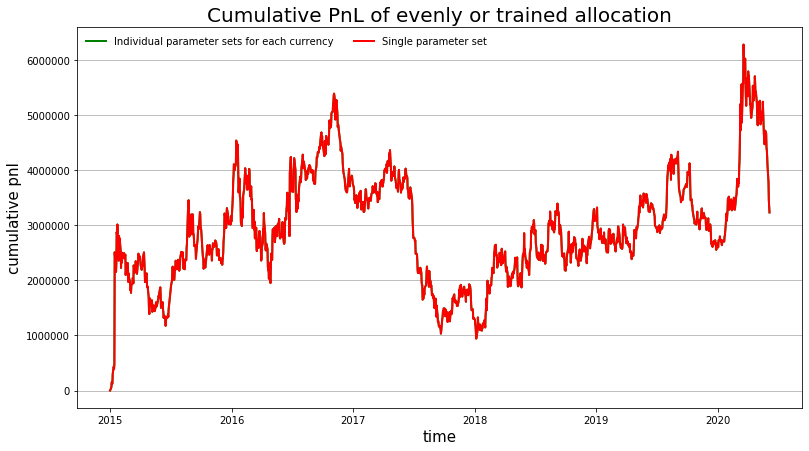

In [23]:
plt.figure(figsize = (13,7))
plt.title('Cumulative PnL of evenly or trained allocation', fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('cumulative pnl', fontsize = 15)
plt.grid(axis = 'y')
plt.plot(x1.index, x1['pnl'].cumsum(), '-', color = 'green', linewidth = 2)
plt.plot(x2.index, x2['pnl'].cumsum(), '-', color = 'red', linewidth = 2)
plt.legend(['Individual parameter sets for each currency', 'Single parameter set'], frameon = False, ncol = 2, fontsize = 10)
plt.show()

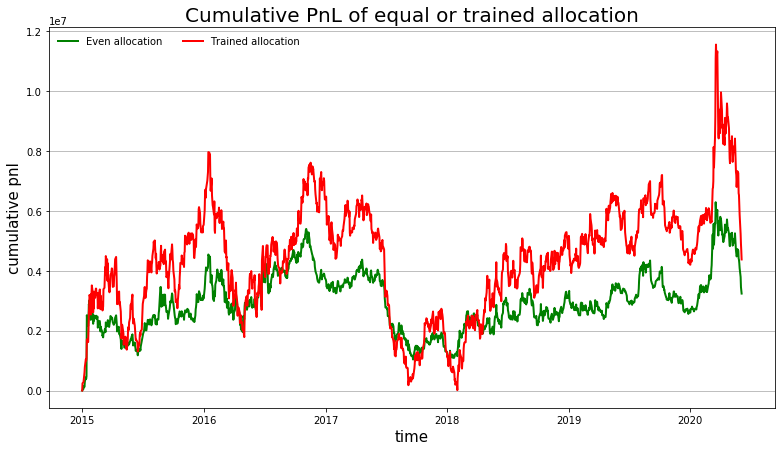

In [24]:
plt.figure(figsize = (13,7))
plt.title('Cumulative PnL of equal or trained allocation', fontsize = 20)
plt.xlabel('time',fontsize = 15)
plt.ylabel('cumulative pnl', fontsize = 15)
plt.grid(axis = 'y')
plt.plot(x2.index, x1['pnl'].cumsum(), '-', color = 'green', linewidth = 2)
plt.plot(x3.index, x3['pnl'].cumsum(), '-', color = 'red', linewidth = 2)
plt.legend(['Even allocation', 'Trained allocation'], frameon = False, ncol = 2, fontsize = 10)
plt.show()

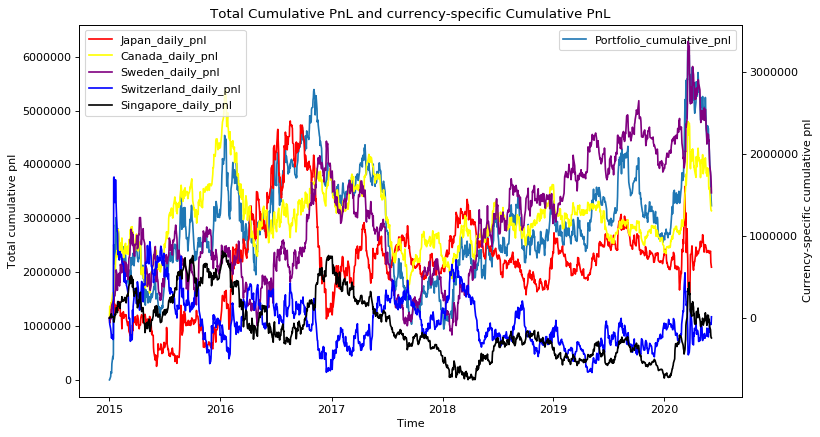

In [25]:
s.Dynamic_plot(x1)

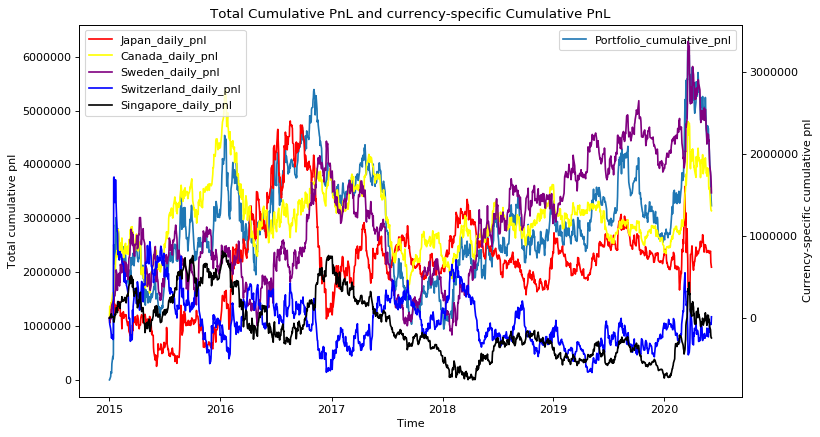

In [26]:
s.Dynamic_plot(x2)

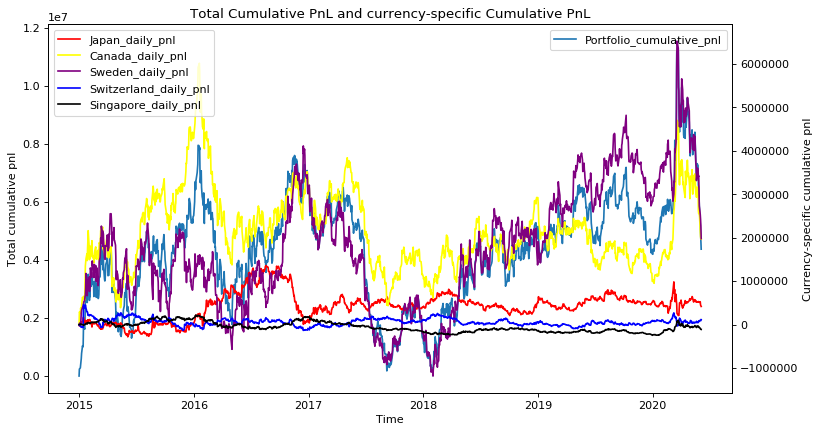

In [27]:
s.Dynamic_plot(x3)

#### Statistics of tuned parameter for each currency and even allocation

In [28]:
s.Strats_eval(x1, 10e6)

,Return on Investment,Volatility,Downside Beta,Value at Risk at 90% CL,Value at Risk at 99% CL,Maximum Drawdown,annualized ROI,annualized sharpe ratio,annualized sortino ratio
0,0.323342,0.012298,-0.938339,-0.016604,-0.037072,0.289056,0.064668,0.379597,0.674019


#### Statistics of one set of tuned parameters for all currency and even allocation

In [29]:
s.Strats_eval(x2, 10e6)

,Return on Investment,Volatility,Downside Beta,Value at Risk at 90% CL,Value at Risk at 99% CL,Maximum Drawdown,annualized ROI,annualized sharpe ratio,annualized sortino ratio
0,0.323342,0.012298,-0.938339,-0.016604,-0.037072,0.289056,0.064668,0.379597,0.674019


#### Statistics of one set of tuned parameters for all currency and trained allocation

In [30]:
s.Strats_eval(x3, 10e6)

,Return on Investment,Volatility,Downside Beta,Value at Risk at 90% CL,Value at Risk at 99% CL,Maximum Drawdown,annualized ROI,annualized sharpe ratio,annualized sortino ratio
0,0.43719,0.018322,-0.983235,-0.032509,-0.06464,0.442287,0.087438,0.412929,0.661842


Result: 

1. By comparing the first and second experiment, we can observe that training individual set of parameters for each currency does not improve the performance of strategy significantly (observe from plot 1 that the pnl for two experiments overlap with each other). On the other hand, allocating capital according to training set's best sortino ratios outperforms evenly allocating capital for majority of the time (however, note that this also increases the volatility of strategy)

2. By using trained weight1, weight2 and stop ratio and allocating relative to sortino ratios, the strategy yields a total return of 43.7% (8.7% annualized), sharpe ratio is 0.412929, sortino ratio is 0.661842, downside beta is -0.983235, VaR at 99% is -0.06464, Maximum Drawdown is 0.442287. Therefore, compared to static threshold strategy, this strategy is much less profitable and experience greater volatility.

3. From plot of country-specific cumulative pnl, we find that the most profitable pairs are USD/SEK and USD/CAD. Even though USD/JPY performs relatively well from 2016- 2017, the fact that it is too volatile and it has significantly larger fluctuation than USD/SEK and USD/CAD results in us allocating less capital to it. USD/CNF and USD/SGD cumulative pnl fluctute around zero (most of the time above zero). As USD/SEK and USD/CAD are indeed the best performing ones from the training set, which means they get bigger allocation of capital. 

# Analysis

## Parameter Analysis and Tuning

#### Initial Inspection 
We first examines how the parameters $\theta$ and S (stop loss percentage) influence the final cumulative profit through plotting heatmaps. We observe a few patterns



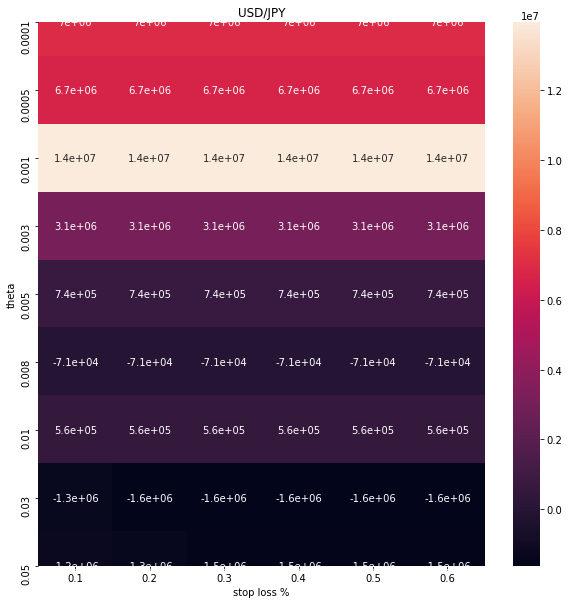

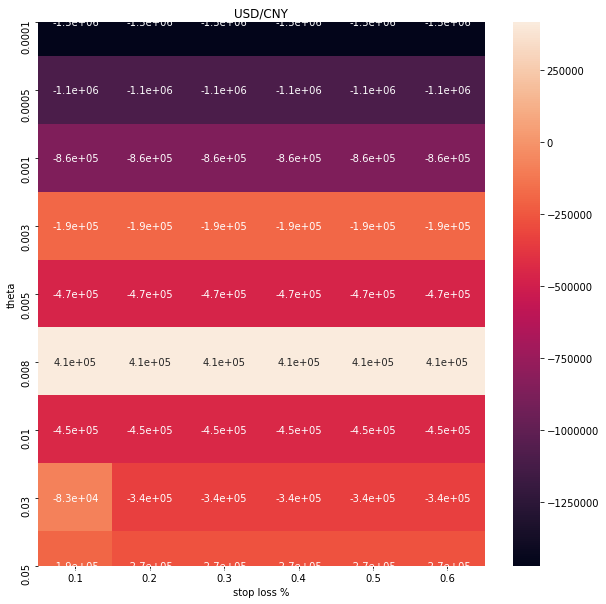

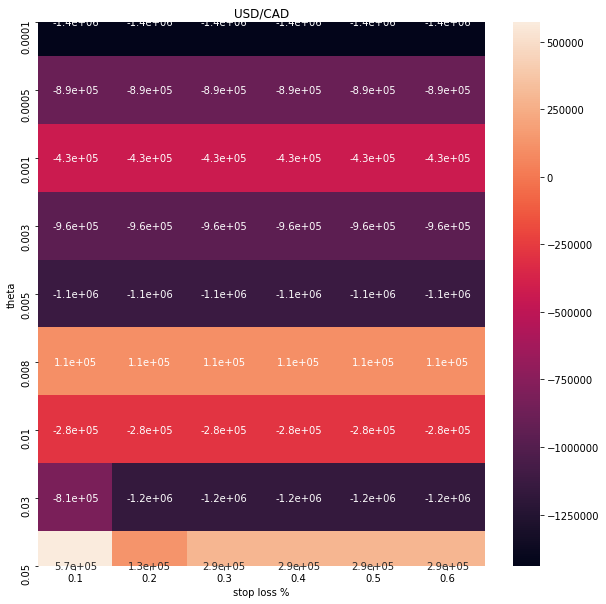

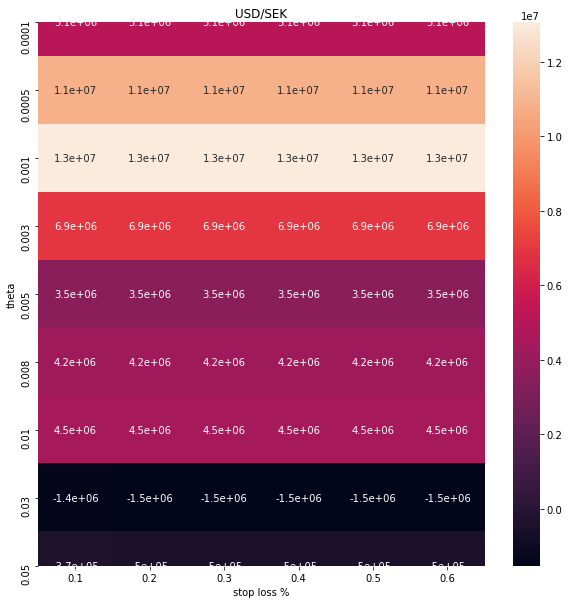

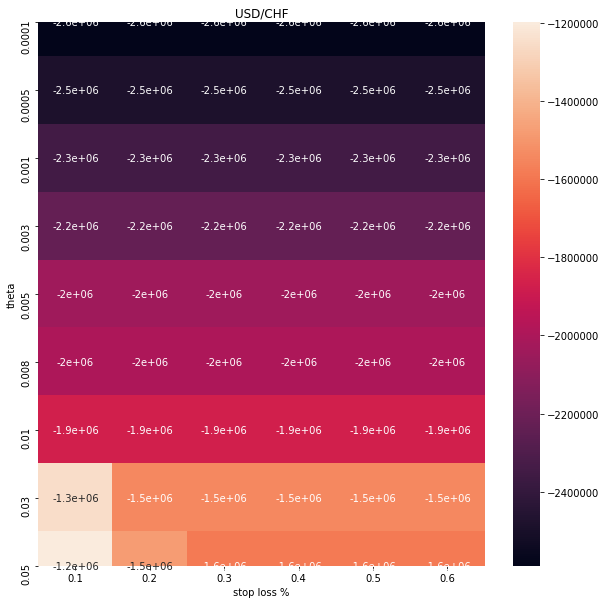

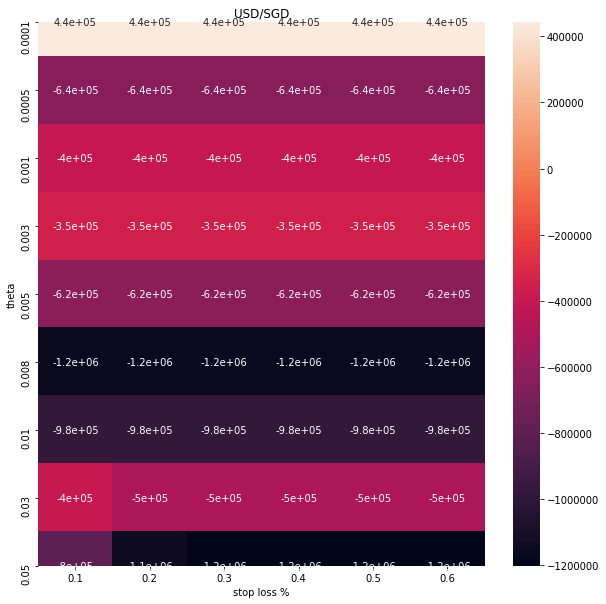

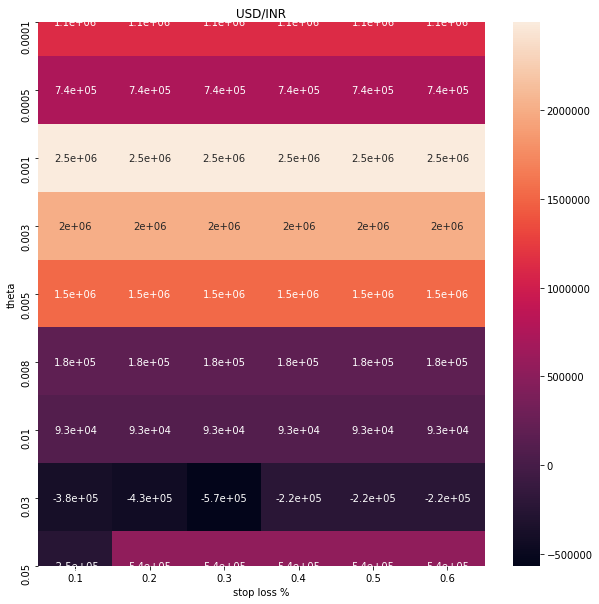

IndexError: list index out of range

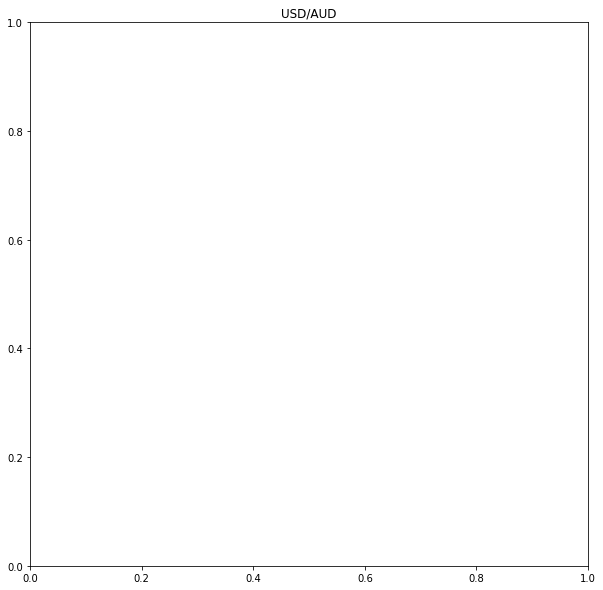

In [31]:
index_data = [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.008, 0.01, 0.03, 0.05]  #the theta list
index_symbol = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
s.draw_heatmap(index_data, index_symbol, dfs)

We first examines how the parameters $\theta$ and S (stop loss percentage) influence the final cumulative profit through plotting heatmaps. We observe a few patterns
1. S seems not very influential except in cases where our PNL are negative. This makes sense because it is a stop loss parameter. Therefore, we decided to choose a static 10% stop loss for our strategies.

2. $\theta$ seems very influential and its association with final profit varies for different currencies:

    (1)JPY: smaller theta generally performs better, and the best is around 0.001

    (2)CNY: theta around 0.008 performs the best

    (3)CAD: theta around 0.05 performs the best, and is ok around 0.008

    (4)SEK: smather theta generally performs better, and the best is around 0.0001

    (5)CHF: smather theta performs better, and the best is around 0.0001

    (6)SGD: smather theta generally performs better, and the best is around 0.0001

    (7)IDR: theta in the range of $[0.001,0.005]$ performs better


3. so we summarize that its better to choose small $theta$ for low interest rate currency in order to trade more actively. And to use larger theta for large interest rate currency to avoid (loss + interest) from making incorrect trend-following decision.

Note that the qualitative analysis is limited because we pick a list of theta values and S values: 

theta = $[0.0001, 0.0005, 0.001, 0.003, 0.005, 0.008, 0.01, 0.03, 0.05]$  

S = $[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]$. 

We also attempt to set up the problem as numerical optimization:
$$\begin {equation*} PROFITfinal = f (\theta, S)  \end {equation*}$$
yet because of the irregular function f, it becomes difficult for us to find the true optimal after trying different methods of scipy.optimize package

#### Train/Test Split
After getting a general sense of sensitivity to theta, we decided to use a training set (2013/01/01-2014/12/31) to select the best performing theta in terms of sortino ratio. We start with a list of theta as 0.001 to 0.01 with 0.001 increments and 0.01 to 0.05 with 0.01 increments. Each currency-pair separately run the first model and produce a theta with the best sortino ratio. From Figure 2, we can see that this set of trained theta significantly out perform a uniform, fixed theta. 

Because of the variation in sortino ratios, we also tested using different capital allocation for our portfolio method. We tested 1) Even capital allocation, and 2) capital allocation with respect to training set sortino ratios. After getting a list of best sortino ratios for each currency's single-currency trading using Model 1, we calculate the allocation using $allocation_x = \frac{sortino_x}{\sum{sortinos}}$ to make sure the allocation adds up to 1. From Figure 1, we can see that this method of allocation also significantly outperforms evenly allocating capital. 

Therefore, we conclude that this method of train/test split is very effective. 


#### Dynamic Threshold Performance
From the Dybamic Threshold Model Implementation, we observe that this model does not perform up to expectation, i.e. have a better performance than the static threshold model. From our research and understanding, we think that the following reason that impact the performance:

We did not take certain situations into considerations, such as when something extreme is noticed in the previous day or overnight. According to the paper, if something has happened the previous day, then the threshold is the sum of A and B metrics only, otherwise if it happened overnight/ is still unfolding ,then the threshold is the sum of A and C metrics only. The threshold value should be reduced if a price change was noticed in the share prices to ensure the detection of an event as we are confident something has happened the previous day or overnight. Furthermore, this ensure that the threshold value is reduced if something extreme happened the previous day and continues to unfold overnight (between previous day closing price and current day opening price) which will result in too high a threshold value which might not be able to detect events.

However, there is no strict boundary with which we can determine "something extreme has happened", i.e. we need another threshold(s) to determine whether the change in the previous day or overnight is too large. Hence, we did not include this part in our implementation, which could possibly cause the threshold to be too high at some time and certain events are not detected for us to change our position, therefore causing a continual loss in some cases. 

## Risk Management

### Risk Control for trading strategy

**Procedures taken to control risk during trading:**

1. Use 5x leverage to control the total position
2. Implementation of a 10% stop loss 
3. Uneven capital allocation according to sortino ratios - as a consequence, currency pairs with low return/risk ratio in training period will be given less weight than higher return/risk ratio ones.

**Other potential uncontrolled risks:**


1. In our training/testing split, we choose a previous 2-year period as our training set. Though the results are promising, it can be a potential risk if the period chosen does not predict the testing set well, especially since we are using the same set of thetas for the entire 5-year trading period without further tuning. 

2. Interest rate risk: Most currencies we chose are low-interest rate currencies. Though borrowing costs are quite minimal in our strategy, it is still a small risk if it increases buy a lot during the trading period. Since we determine the capital allocation only before trading starts, if this fluctuation in interest rates makes this currency pair unattractive, we cannot adjust the capital allocation during trading.

3. We also assumed trading at the daily-closing price, with no bid-ask spread, which is not always realistic.

### Risk Evaluation for simulation result

For Fixed Threshold trading(trained theta and capital allocation):

1. The standard deviation of daily returns of our procedure is 0.97%, making the standard deviation of annual return around 18%, suggesting a high volatility. However, since our annual return is 72% for this strategy, this high level of risk is still reasonable.

2. The maximum drawdown is 28%, though not perfect, it is a acceptable level of risk.

3. This strategy yields a annualized sharpe ratio of 1.74 and sortino ratio of 2.40, which are both very attractive. This suggests that the return relative to risk is high. 

For Dynamic Threshold trading:

1. The standard deviation of daily returns of our procedure is 1.832%, which is significantly higher than that of the fixed threshold trading, suggesting high volatility.

2. The maximum drawdown is 44%, which is a relatively high level of risk.

3. This strategy yields a annualized sharpe ratio of 0.412929 and sortino ratio of 0.661842, which are both not too attractive given the high level of risk. This suggests that the return relative to risk is low. 


# Summary

In this study, we find our DC based trading strategy to be profitable(high PNL and return), with a relatively high level of risk(high volatility and maximum drawdown), but mostly robust(low VaR, downside beta, high sharpe ratio and sortino ratio). Both FT and DT versions trade frequently, so most profit is captured by identifying the right event to profit from continuition of the trend during OS period. Falsely dentifying momentum that does not last result in losses, as shown by the result of DT strategy underperforming that of FT strategy. There is still big room of improvement for this strategy: We stick with trend following, but this is not always optimal because trend reversal also exists in the foreign exchange market. Correctly identifying these opportunity will obtain more profit. Also, if we could model the dynamics between OS event and DC event, our result could be further optimized. 